# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [14]:
#import libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load datasets
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [25]:
df.drop(labels = ['sepal length (cm)', 'sepal width (cm)'], axis = 1, inplace = True)
df

petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]

## <font color = blue> 2. Data Manipulationa and visualization

In [26]:
#visualize your data here
df.isna().sum()


petal length (cm)    0
petal width (cm)     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

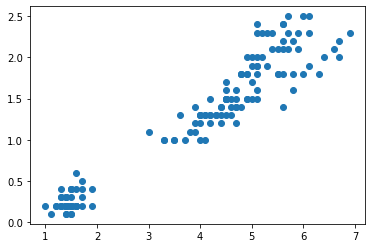

In [27]:
import matplotlib.pyplot as plt

x = df['petal length (cm)']
y = df['petal width (cm)']
plt.scatter(x,y)
plt.show

## <font color = blue> 3. Train model

In [28]:
#train your model here
from sklearn.cluster import KMeans

x = df[['petal length (cm)','petal width (cm)']]
kmean= KMeans(n_clusters=3, random_state=0)

In [29]:
mean = kmean.fit(x)

## <font color = blue> 4. Explore KMeans attributes

In [30]:
#check Kmean algorithm's attribute
mean.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [31]:
mean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
mean.inertia_

31.371358974358976

In [34]:
mean.n_iter_

6

In [36]:
mean.n_features_in_

2

In [38]:
mean.feature_names_in_

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

## <font color = blue> 5. Prediction

In [54]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample = [[1.5, 0.2]]
y_pred = mean.predict(x_sample)

C:\Users\pephe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [63]:
y_pred

array([0])

## <font color = blue> 6. Plotting clusters with thier centroids

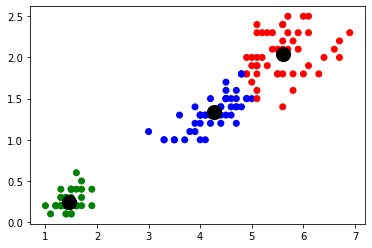

In [58]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.

colormap = np.array(['g', 'r', 'b'])
categories = mean.predict(x)

plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = colormap[categories])

centers = mean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200);

## <font color = blue> 7. Use elbow method to choose K for Kmean

C:\Users\pephe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

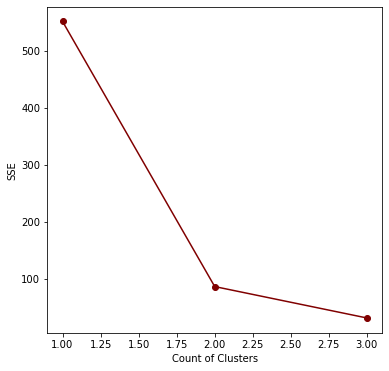

In [60]:
# plot grah to decide K value for given dataset.
sse = []
for k in range(1, 4):
    km = KMeans(n_clusters = k)
    km.fit(x)
    sse.append(km.inertia_)

# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, 4), sse, '-o', c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE')

